London Bike Sharing Tableau Python Project

In [24]:
import matplotlib.pyplot as plt

In [6]:
!pip install pandas
!pip install zipfile
!pip install kaggle


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
# import relevant libraries
import pandas as pd 
import zipfile
import kaggle

In [11]:
# Download dataset from kaggle using kaggle API
!kaggle datasets download -d hmavrodiev/london-bike-sharing-dataset

Dataset URL: https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset
License(s): other




  0%|          | 0.00/165k [00:00<?, ?B/s]
100%|██████████| 165k/165k [00:00<00:00, 1.48MB/s]
100%|██████████| 165k/165k [00:00<00:00, 1.35MB/s]


In [14]:
import os
import subprocess

# Create the 'data' directory if it doesn't exist
data_dir = 'data'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

# Download the dataset to the 'data' directory
kaggle_command = [
    'kaggle', 'datasets', 'download',
    '-d', 'hmavrodiev/london-bike-sharing-dataset',
    '-p', data_dir
]

subprocess.run(kaggle_command, check=True)

# Optionally, unzip the downloaded dataset
zip_path = os.path.join(data_dir, 'london-bike-sharing-dataset.zip')
if os.path.exists(zip_path):
    import zipfile
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(data_dir)
    os.remove(zip_path)  # Remove the zip file after extraction


In [16]:
# read data as a dataframe
bikes = pd.read_csv("./data/london_merged.csv")

In [17]:
# explore data
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [18]:
# check the shape of the dataset
bikes.shape

(17414, 10)

In [19]:
bikes.head(10)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0


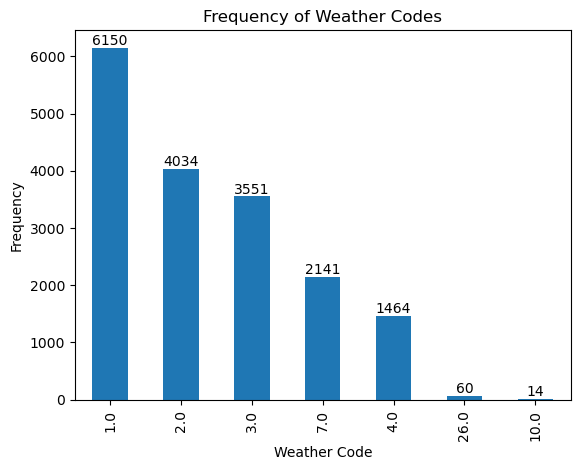

In [25]:
# Plot the unique values of weather_code
counts = bikes.weather_code.value_counts()
ax = counts.plot(kind='bar')

# Add the value on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')
# Add labels and title
plt.xlabel('Weather Code')
plt.ylabel('Frequency')
plt.title('Frequency of Weather Codes')
plt.show()

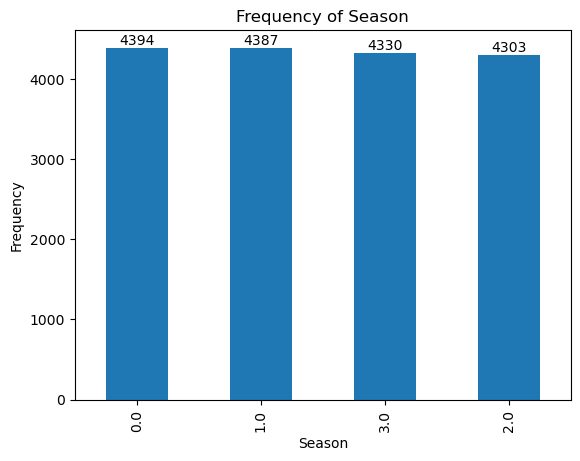

In [26]:
# Plot the unique values of season
counts = bikes.season.value_counts()
ax = counts.plot(kind='bar')

# Add the value on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')
# Add labels and title
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.title('Frequency of Season')
plt.show()